## Importations des Bibliotheques

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sentence_transformers import SentenceTransformer

**Interpretation**

importation des bibliothèques fondamentales pour l'analyse de données et l'apprentissage automatique et la mise en place d'un pipeline complet de machine learning orienté.

In [35]:
data = pd.read_csv("Dataset_Abandon_Scolaire.csv")
data.head(10)

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0
5,20,Femme,100.000000,0,15.343097,Marié,0
6,24,Homme,87.798400,1,11.869304,Célibataire,0
7,22,Femme,76.967563,3,13.868003,Célibataire,0
8,20,Femme,84.236286,2,12.621463,Enfants à charge,0
9,22,Homme,70.790029,4,10.941972,Marié,0


**Interpretation**

On constate que l'ensemble de nos données est co,nstituées de 7 cols; 10 rows et prét de 2000 entries de types differents float64(2), int64(3), object(2).

In [36]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sexe                 2000 non-null   object 
 2   Taux_presence        2000 non-null   float64
 3   Nombre_retards       2000 non-null   int64  
 4   Note_moyenne         2000 non-null   float64
 5   Situation_familiale  2000 non-null   object 
 6   Abandon              2000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 109.5+ KB


In [37]:
# profile = ProfileReport(data, title="Analysis of abandon school", explorative=True, minimal=True)
# profile.to_file("Analysis of abandon school.html")

**Interpretation**

générer un rapport d'analyse détaillé et interactif du jeu de données. cette approche nous permert de faire l'analyse exploratoire automatisée de facon rapide et nous fournir une vue d'ensemble du jeu de données, identifiant les caractéristiques importantes, les anomalies et les relations entre variables avant d'approfondir avec des analyses plus ciblées ou des modèles prédictifs.

In [38]:
# Encodage de la colonne 'Sexe'
data['Sexe'] = data['Sexe'].map({'Homme': 0, 'Femme': 1})

**Interpretation**

Numerisation 

In [ ]:
# Charger le modèle français basé sur CamemBERT
model = SentenceTransformer("dangvantuan/sentence-camembert-large")

# Encoder les valeurs textuelles de 'Situation_familiale' en vecteurs
situations = data["Situation_familiale"].astype(str).tolist()
situation_vectors = model.encode(situations)

# Création d'un DataFrame à partir des vecteurs
situation_data = pd.DataFrame(situation_vectors, columns=[f"situation_vec_{i}" for i in range(situation_vectors.shape[1])])

# Fusionner avec le dataset en supprimant la colonne d'origine
df = pd.concat([data.drop(columns=["Situation_familiale"]), situation_data], axis=1)

No sentence-transformers model found with name dangvantuan/sentence-camembert-large. Creating a new one with mean pooling.


**Interpretation**

Pmet de transformer des données textuelles en vecteurs numériques exploitables pour des modèles de machine learning. Il s’appuie sur un modèle de traitement du langage naturel en français, basé sur CamemBERT, pour encoder la colonne "Situation_familiale" d’un jeu de données. Chaque valeur textuelle (comme "célibataire", "marié", etc.) est convertie en un vecteur dense qui capture le sens sémantique de la phrase. Cette représentation permet d’utiliser ces informations textuelles dans des algorithmes statistiques ou d'apprentissage automatique, qui ne peuvent pas directement traiter du texte brut.

Après l'encodage, les vecteurs générés sont organisés sous forme de colonnes numériques dans un nouveau DataFrame. Ces nouvelles colonnes remplacent la colonne d’origine, supprimée pour éviter les doublons.

In [40]:
# Séparation des variables
X = df.drop('Abandon', axis=1)
y = df['Abandon']
# Standardisation des variables numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Interpretation**

 prépare les données pour un modèle de machine learning en séparant d’abord les variables explicatives (X) de la variable cible (y).

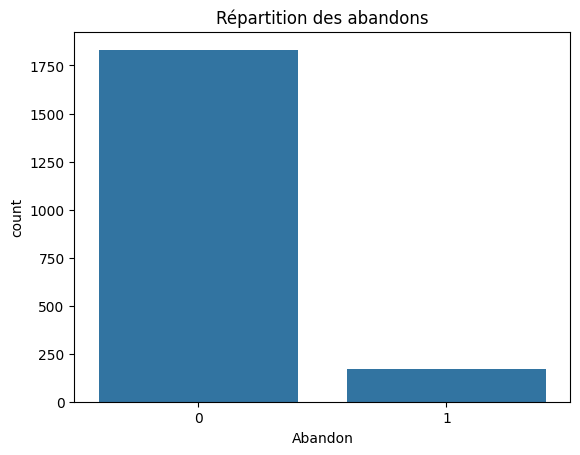

In [41]:
## 📊 4. Visualisation de la distribution de la variable cible
sns.countplot(x='Abandon', data=df)
plt.title('Répartition des abandons')
plt.show()

**Interpretation**

Repartition de la cols Abandon 

Abandon (1 = a abandonné, 0 = n’a pas abandonné)

In [42]:
## 🤖 5. Entraînement et évaluation de plusieurs modèles
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Linear SVM', LinearSVC(max_iter=10000, random_state=42))
]

**Interpretation**

liste de modèles de machine learning classiques qui seront entraînés.


Logistic Regression :
Précision : 95.75%


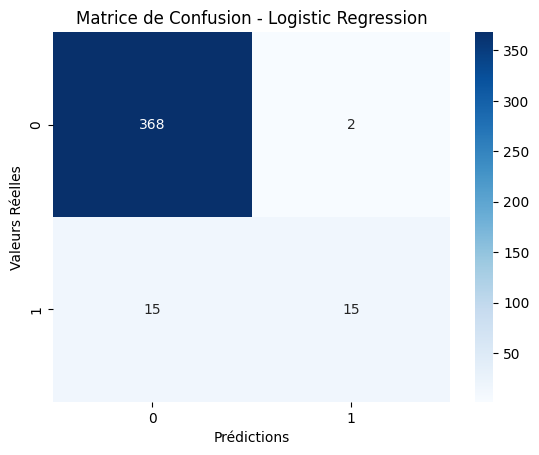

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       370
           1       0.88      0.50      0.64        30

    accuracy                           0.96       400
   macro avg       0.92      0.75      0.81       400
weighted avg       0.95      0.96      0.95       400


Random Forest :
Précision : 95.50%


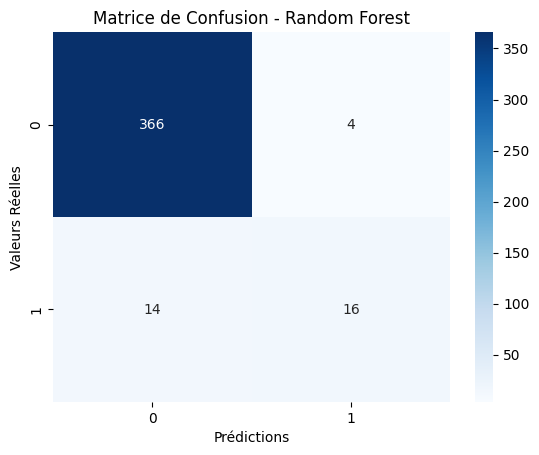

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       370
           1       0.80      0.53      0.64        30

    accuracy                           0.95       400
   macro avg       0.88      0.76      0.81       400
weighted avg       0.95      0.95      0.95       400


Support Vector Machine :
Précision : 92.50%


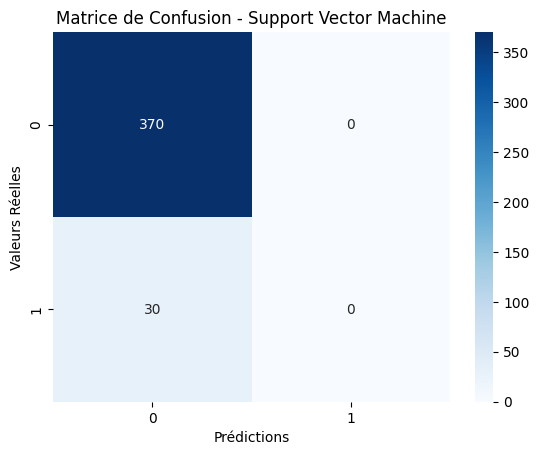

Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       370
           1       0.00      0.00      0.00        30

    accuracy                           0.93       400
   macro avg       0.46      0.50      0.48       400
weighted avg       0.86      0.93      0.89       400


K-Nearest Neighbors :
Précision : 94.25%


c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

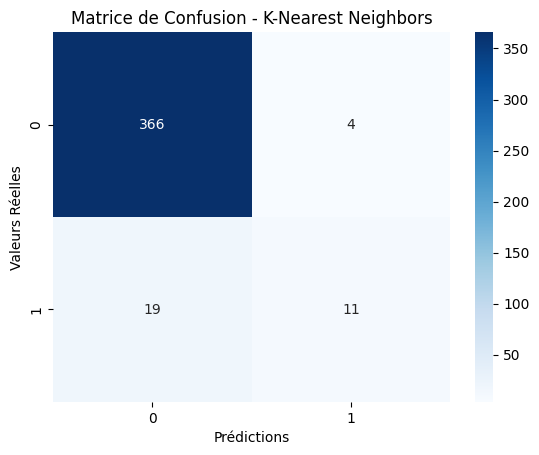

Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       370
           1       0.73      0.37      0.49        30

    accuracy                           0.94       400
   macro avg       0.84      0.68      0.73       400
weighted avg       0.93      0.94      0.93       400


Decision Tree :
Précision : 95.25%


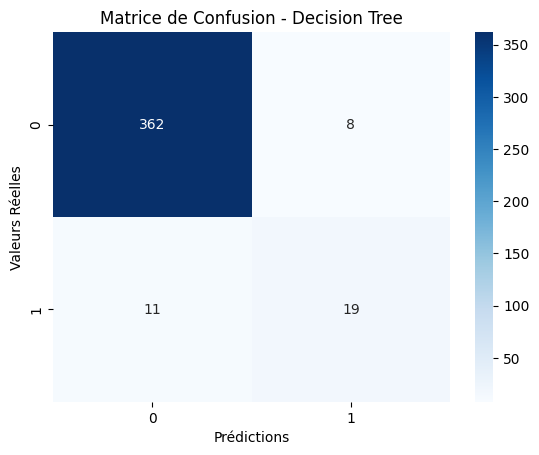

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       370
           1       0.70      0.63      0.67        30

    accuracy                           0.95       400
   macro avg       0.84      0.81      0.82       400
weighted avg       0.95      0.95      0.95       400


AdaBoost :
Précision : 96.25%


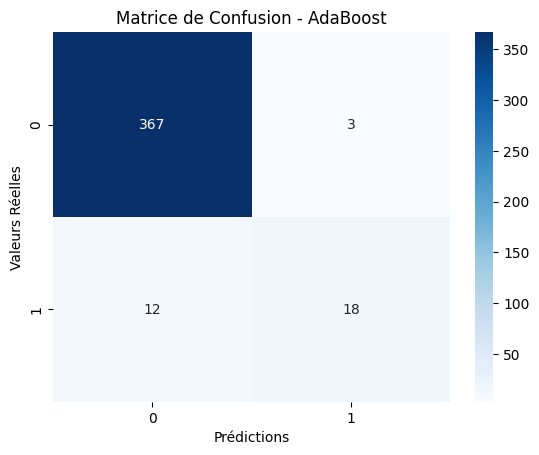

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       370
           1       0.86      0.60      0.71        30

    accuracy                           0.96       400
   macro avg       0.91      0.80      0.84       400
weighted avg       0.96      0.96      0.96       400


Naive Bayes :
Précision : 81.50%


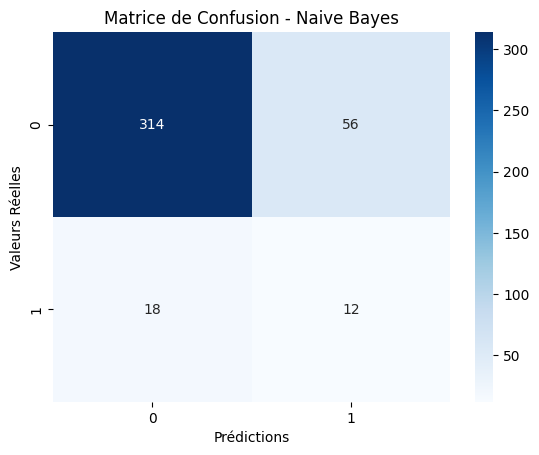

Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       370
           1       0.18      0.40      0.24        30

    accuracy                           0.81       400
   macro avg       0.56      0.62      0.57       400
weighted avg       0.89      0.81      0.85       400



c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:01:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost :
Précision : 96.50%


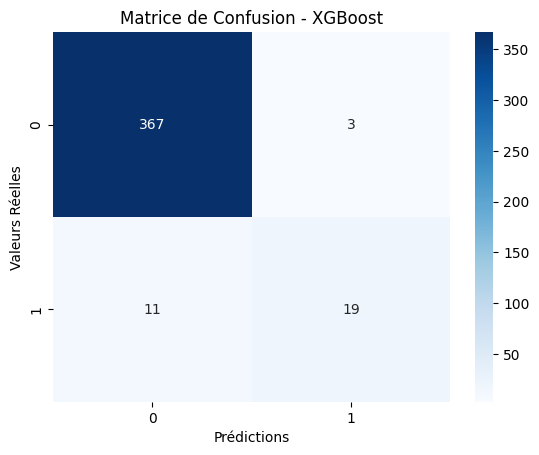

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       370
           1       0.86      0.63      0.73        30

    accuracy                           0.96       400
   macro avg       0.92      0.81      0.86       400
weighted avg       0.96      0.96      0.96       400


Linear Discriminant Analysis :
Précision : 95.00%


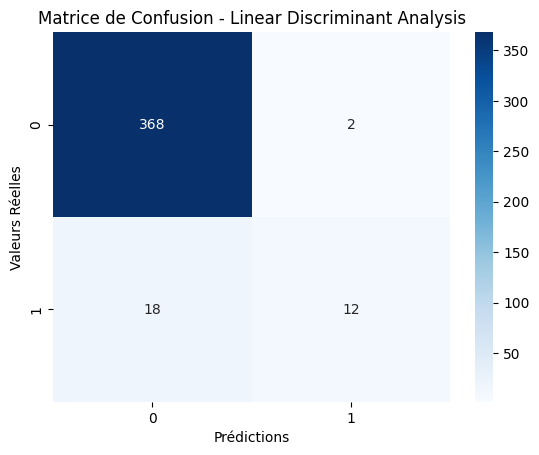

Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       370
           1       0.86      0.40      0.55        30

    accuracy                           0.95       400
   macro avg       0.91      0.70      0.76       400
weighted avg       0.95      0.95      0.94       400


Linear SVM :
Précision : 94.75%


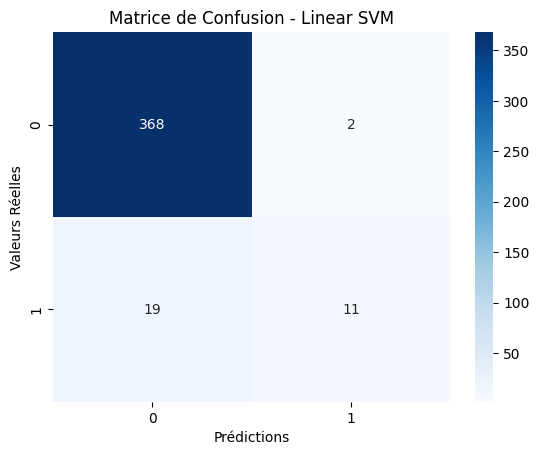

Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       370
           1       0.85      0.37      0.51        30

    accuracy                           0.95       400
   macro avg       0.90      0.68      0.74       400
weighted avg       0.94      0.95      0.94       400



In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} :")
    print(f"Précision : {accuracy_score(y_test, y_pred) * 100:.2f}%")

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de Confusion - {name}')
    plt.xlabel('Prédictions')
    plt.ylabel('Valeurs Réelles')
    plt.show()

    # Rapport de classification
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred))

**Interpretation**

Les resultats des models

Avec un bon équilibre entre précision, rappel et score F1, XGBoost, AdaBoost et la régression logistique atteignent tous une précision de 0,96 (XGBoost affiche notamment un score F1 de 0,73).

AdaBoost combine également un rappel élevé (0,60) et une bonne précision (0,86), ce qui lui confère un score F1 élevé (0,71).

La machine à vecteurs de support (SVC) se caractérise par des scores négatifs sur toutes les métriques, à l'exception de la précision (0,93), ce qui indique probablement un problème d'implémentation, de calibrage ou de gestion des classes déséquilibrées (par exemple, elle peut ne prédire qu'une seule classe).

Malgré une précision modérée de 0,81, Naive Bayes affiche des performances globales médiocres, notamment une précision très faible (0,18) et un score F1 très faible (0,24). Cela indique qu'elle commet de nombreuses erreurs.

In [44]:
df.head(10)

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Abandon,situation_vec_0,situation_vec_1,situation_vec_2,situation_vec_3,...,situation_vec_1014,situation_vec_1015,situation_vec_1016,situation_vec_1017,situation_vec_1018,situation_vec_1019,situation_vec_1020,situation_vec_1021,situation_vec_1022,situation_vec_1023
0,21,1,89.585023,2,15.826896,0,-0.162342,0.180908,-0.067938,-0.262235,...,-0.272353,0.254691,-0.171585,-0.050947,-0.271998,0.059314,-0.127156,-0.029747,0.153980,0.024057
1,20,0,70.713068,3,12.829358,0,0.506969,0.158495,0.063904,-0.038022,...,-0.543815,0.072981,-0.590823,-0.225588,0.516648,0.611939,0.045980,0.099489,-0.528929,-0.146725
2,22,1,82.122963,1,13.086319,0,-0.162342,0.180908,-0.067938,-0.262235,...,-0.272353,0.254691,-0.171585,-0.050947,-0.271998,0.059314,-0.127156,-0.029747,0.153980,0.024057
3,24,0,87.408859,3,14.992032,0,0.506969,0.158495,0.063904,-0.038022,...,-0.543815,0.072981,-0.590823,-0.225588,0.516648,0.611939,0.045979,0.099488,-0.528929,-0.146725
4,20,0,86.470676,3,12.671649,0,0.324225,0.315454,0.033457,-0.423710,...,-0.258813,-0.076659,-0.393912,0.010073,0.418810,-0.183506,0.533533,-0.239967,0.126970,-0.026365
5,20,1,100.000000,0,15.343097,0,0.324225,0.315454,0.033457,-0.423710,...,-0.258813,-0.076659,-0.393912,0.010073,0.418810,-0.183506,0.533533,-0.239967,0.126970,-0.026365
6,24,0,87.798400,1,11.869304,0,0.506969,0.158495,0.063904,-0.038022,...,-0.543815,0.072981,-0.590823,-0.225588,0.516648,0.611939,0.045980,0.099489,-0.528929,-0.146725
7,22,1,76.967563,3,13.868003,0,0.506969,0.158495,0.063904,-0.038022,...,-0.543815,0.072981,-0.590823,-0.225588,0.516648,0.611939,0.045980,0.099489,-0.528929,-0.146725
8,20,1,84.236286,2,12.621463,0,-0.162342,0.180908,-0.067938,-0.262235,...,-0.272353,0.254691,-0.171585,-0.050947,-0.271998,0.059314,-0.127156,-0.029747,0.153980,0.024057
9,22,0,70.790029,4,10.941972,0,0.324225,0.315454,0.033457,-0.423710,...,-0.258813,-0.076659,-0.393912,0.010073,0.418810,-0.183506,0.533533,-0.239967,0.126970,-0.026365


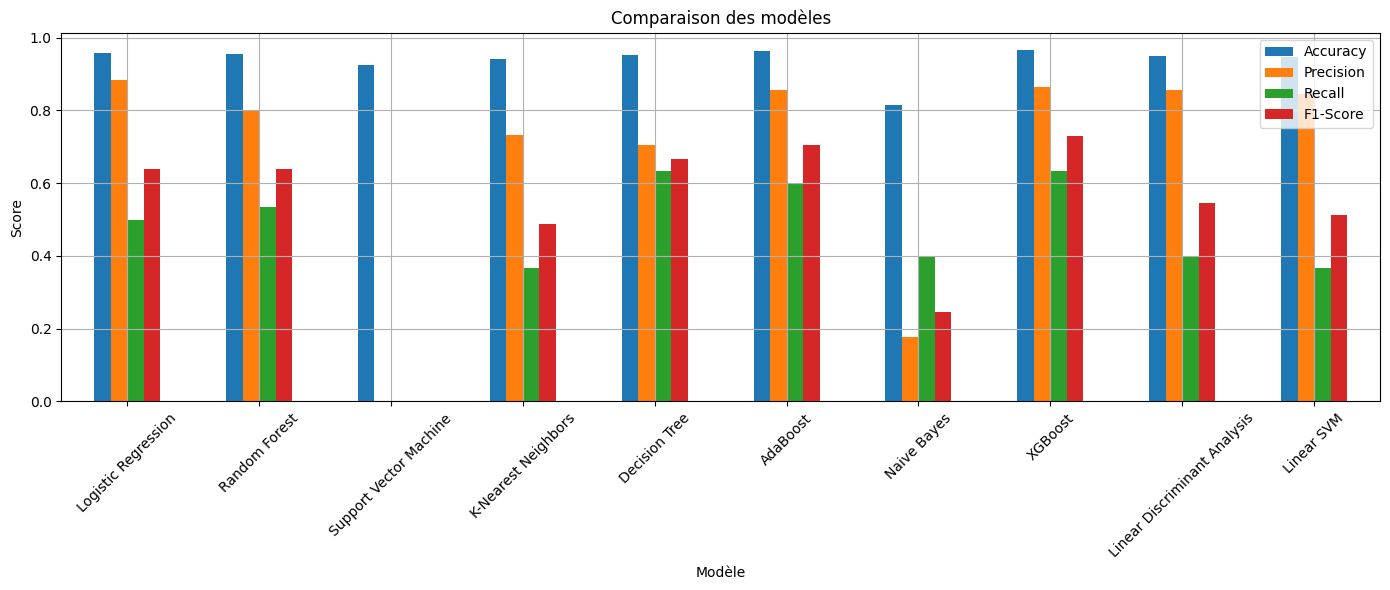

In [ ]:
## 📈 6. Visualisation comparative des performances
if not results:
	for name, model in models:
		y_pred = model.predict(X_test)
		accuracy = accuracy_score(y_test, y_pred)
		precision = precision_score(y_test, y_pred, zero_division=0)
		recall = recall_score(y_test, y_pred, zero_division=0)
		f1 = f1_score(y_test, y_pred, zero_division=0)
		results.append([name, accuracy, precision, recall, f1])

# Create the DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Modèle', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df.set_index('Modèle', inplace=True)

# Plot the results
results_df.plot(kind='bar', figsize=(14,6))
plt.title('Comparaison des modèles')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation**

comparaison des differents models 

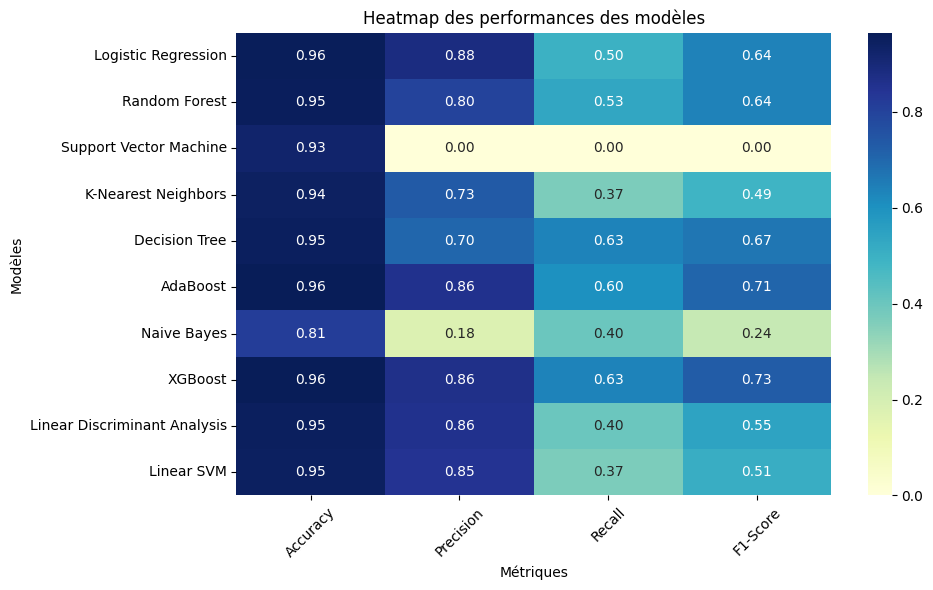

In [50]:
# Heatmap des résultats des modèles
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Heatmap des performances des modèles")
plt.ylabel("Modèles")
plt.xlabel("Métriques")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation**

 Accuracy = 0.96
Cela signifie que 96 % des prédictions du modèle XGBoost sont correctes, toutes classes confondues. C’est un excellent score global, montrant que le modèle fait très peu d’erreurs au total.

 Precision = 0.86
La précision mesure la proportion de vraies prédictions positives parmi toutes les prédictions positives. Un score de 0.86 indique que 86 % des cas prédits comme "abandon" sont effectivement des abandons.

Recall = 0.63
Le rappel mesure la capacité du modèle à identifier correctement tous les cas réels d’abandon. Un score de 0.63 signifie que 63 % des abandons réels ont été correctement détectés par le modèle.

 F1-Score = 0.73
Le F1-score est la moyenne harmonique entre précision et rappel, ce qui en fait une mesure équilibrée de la performance globale pour la classe positive (abandon).


In [56]:
df[["Abandon"]].value_counts()

Abandon
0          1832
1           168
Name: count, dtype: int64

## Normalisation standard

In [59]:
problem = df.drop("Abandon", axis=1)
solution = df["Abandon"]
standard_scaler = StandardScaler()
normalized_problem = standard_scaler.fit_transform(problem)
X_train, X_test, y_train, y_test = train_test_split(normalized_problem, solution, random_state=42)

## K-NN

In [ ]:
def get_optimal_k_value(normalized_problem, solution):
    n_folds = 5
    parameters = {"n_neighbors" : np.arange(1, 52, 2)}
    grid_search_object = GridSearchCV(KNeighborsClassifier(),
                                    parameters,
                                     cv=n_folds,
                                     scoring="f1_macro")
    
    grid_search_object.fit(normalized_problem, solution)
    print(grid_search_object.best_params_)
    best_model = grid_search_object.best_estimator_
    scores = pd.DataFrame(grid_search_object.cv_results_)
    return best_model, scores
best_model, scores_df = get_optimal_k_value(normalized_problem, solution)
scores_df = scores_df[["params", "mean_test_score"]]
scores_df

{'n_neighbors': np.int64(5)}


,params,mean_test_score
0,{'n_neighbors': 1},0.720700
1,{'n_neighbors': 3},0.718053
2,{'n_neighbors': 5},0.737658
3,{'n_neighbors': 7},0.734940
4,{'n_neighbors': 9},0.735575
5,{'n_neighbors': 11},0.725425
6,{'n_neighbors': 13},0.725408
7,{'n_neighbors': 15},0.703195
8,{'n_neighbors': 17},0.703088
9,{'n_neighbors': 19},0.715447


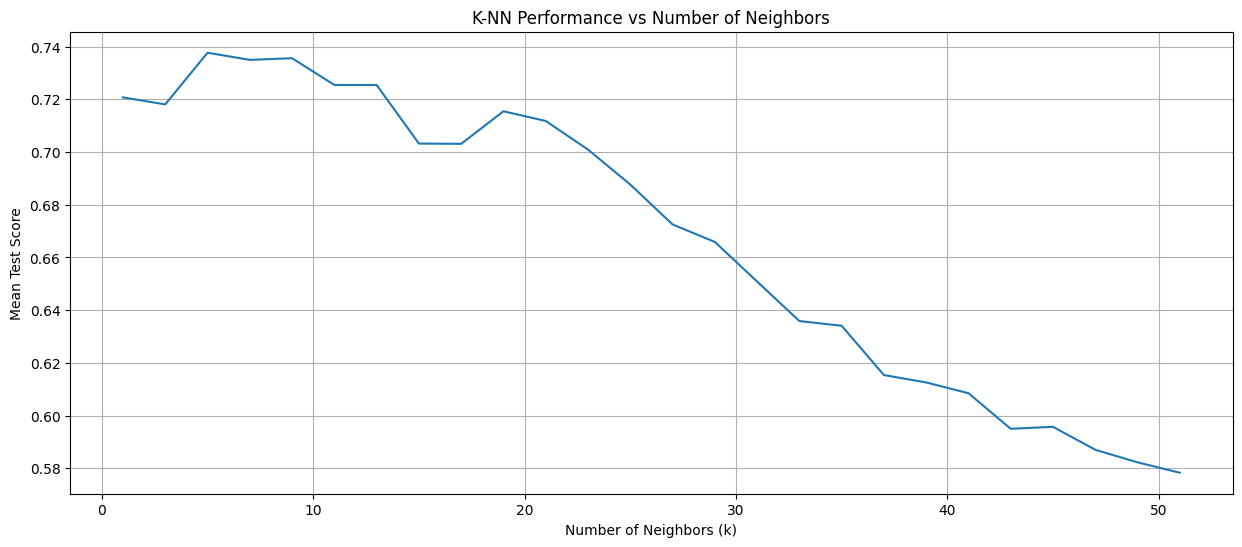

In [66]:
plt.figure(figsize=(15,6))
plt.plot(scores_df["params"].apply(lambda x: x["n_neighbors"]), scores_df["mean_test_score"])
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Test Score")
plt.title("K-NN Performance vs Number of Neighbors")
plt.grid(True)
plt.show()

In [69]:
knn = KNeighborsClassifier(n_neighbors=best_model.n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=np.int64(5))

In [71]:
# Ensure the index is within bounds
test_index = 199  # Replace 199 with a valid index within the range of X_test
distances, indices = knn.kneighbors([X_test[test_index]])
print(distances[0])
print(indices[0])
for indice in indices[0]:
    print(y_train.iloc[indice])

[0.06839485 0.52191181 0.61781949 0.73342982 0.84980279]
[985 582 172  11 570]
0
0
0
1
1
